In [1]:
import pandas as pd
import numpy as np

In [2]:
animals=['Tiger','Lion','Cat']
r = pd.Series(animals) #return series with index as integer and  dtype as obj
r,r.dtype

(0    Tiger
 1     Lion
 2      Cat
 dtype: object, dtype('O'))

In [3]:
numbers=[1,2,3]
pd.Series(numbers).dtype # return series with dtype as int

dtype('int64')

In [4]:
numbers=[1,2,3]
pd.Series(numbers,dtype=float) # return series with dtype as flot

0    1.0
1    2.0
2    3.0
dtype: float64

In [5]:
animals=['Tiger','Lion','Cat',None] # list contains None
pd.Series(animals) #returns series with dtype obj and None--> None

0    Tiger
1     Lion
2      Cat
3     None
dtype: object

In [6]:
numbers=[1,2,3,None] #list contains None
pd.Series(numbers) #return series with dtype as float and None in pandas as Nan-->Not a Number


0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [7]:
np.nan==None #numpy nan is not equal to python None both are different

False

In [8]:
np.nan==np.nan # this is also not True

False

In [9]:
# if you want to check nan we need special function np.isnan()
np.isnan(np.nan)

True

In [10]:
kidsPlay={'a':'apple','b':'ball','c':'Cat'} 
s=pd.Series(kidsPlay) #index values can be changed as keys from dictionary
s

a    apple
b     ball
c      Cat
dtype: object

In [11]:
s.index # return index of series 

Index(['a', 'b', 'c'], dtype='object')

In [12]:
s=pd.Series(['Apple','Ball','Cat'],index=['A','B','C']) # set index  explicitly
s

A    Apple
B     Ball
C      Cat
dtype: object

In [13]:
# QUERY from series

In [14]:
# Pandas can be query either by index position or the index label

In [15]:
# to query by numerical location use  iloc attribute   or query by index label use loc attribute

In [16]:
sports={'Archery':'Bhutan','Golf':'Scotland','Sumo':'Japan','Taekwondo':'South Korea'}
s=pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [17]:
s.iloc[3]

'South Korea'

In [18]:
s.loc['Golf']

'Scotland'

In [19]:
s[0] # indexing operator  return value in index 0 zero

'Bhutan'

In [20]:
s['Archery'] # return value correspond to  given label

'Bhutan'

In [21]:
example={100:'A',200:'B'}
exp=pd.Series(example)
exp

100    A
200    B
dtype: object

In [22]:
#exp[0] 
#exp[0] gives error due to it apply loc attrib

In [23]:
exp.iloc[0]

'A'

In [24]:
# it's prefer to use loc and  iloc attributes instead indexing directly

In [25]:
s=pd.Series([100.00,120.00,101.00,3.00])
s

0    100.0
1    120.0
2    101.0
3      3.0
dtype: float64

In [26]:
# sum the series using iteration but  its slow
total=0
for item in s:
    total+=item
total

324.0

In [27]:
# numpy has a sum function
import numpy as np

In [28]:
total=np.sum(s)
total

324.0

In [29]:
array=np.random.randint(0,1000,10000) # return 10,000 random numbers  between 0 to 1000
s=pd.Series(array)
s.head() # return first 5 elements 

0    547
1    369
2    639
3    491
4    429
dtype: int32

In [30]:
# in jupyter nobook if we type % and press TAB we get list of magic function 

In [31]:
# now we are using cell magic functions these are starts with two percentage signs

In [32]:
%%timeit -n 100
summary=0
for item in s:
    summary+=item

1.39 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%%timeit -n 100
summary=np.sum(s)

180 µs ± 56.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
# when we observe that by using np.sum its fast

In [35]:
# Related features in pandas and numpy is called broadcasting
# with broadcasting ,we can  apply an operation to every value in the series ,changing the series

In [36]:
print(s.head())
s+=2
s.head()

0    547
1    369
2    639
3    491
4    429
dtype: int32


0    549
1    371
2    641
3    493
4    431
dtype: int32

In [37]:
#procedural way iterate through all the items in series and increase values directly
for label,value in s.iteritems():
    #s.at[label, 'ColName'] = 3
    s.iloc[label]=value+2
s

0        551
1        373
2        643
3        495
4        433
5        654
6        607
7         84
8        389
9        578
10       958
11       594
12       785
13       742
14        59
15       841
16       473
17       977
18       795
19        91
20       109
21       662
22       735
23       841
24       632
25       811
26       242
27       515
28       996
29       221
        ... 
9970      78
9971     930
9972     576
9973     372
9974     848
9975     270
9976     403
9977     385
9978     938
9979     745
9980     647
9981     151
9982     269
9983     858
9984    1000
9985     417
9986     368
9987     605
9988     568
9989     662
9990     961
9991     213
9992     402
9993     310
9994     177
9995     199
9996     920
9997      17
9998     269
9999     114
Length: 10000, dtype: int32

In [38]:
%%timeit -n 10
s=pd.Series(np.random.randint(0,1000,1000))
for label,value in s.iteritems():
    s.iloc[label]=value+2


143 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
%%timeit -n 10
s=pd.Series(np.random.randint(0,1000,1000))
s+=2

300 µs ± 94.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
s=pd.Series([1,2,3]) # add new field 
s.loc['Animal']='Bears'
s

0             1
1             2
2             3
Animal    Bears
dtype: object

In [41]:
# example for index not unique in series
original_sports=pd.Series({'Archery':'Bhutan','Golf':'Scotand','Sumo':'Japan','Taekwondo':'South Korea'})
cricket_loving_countries=pd.Series(['Australia','Barbados','Pakistan','England'],index=['Cricket','Cricket','Cricket','Cricket'])
all_countries=original_sports.append(cricket_loving_countries) # pandas append does not change original series instead it return new series
print('all_countries ',all_countries)
print('\n\n\n')
print('original_sports ',original_sports)
all_countries.loc['Cricket'] # return series of cricket

all_countries  Archery           Bhutan
Golf             Scotand
Sumo               Japan
Taekwondo    South Korea
Cricket        Australia
Cricket         Barbados
Cricket         Pakistan
Cricket          England
dtype: object




original_sports  Archery           Bhutan
Golf             Scotand
Sumo               Japan
Taekwondo    South Korea
dtype: object


Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

# Data Frame

#### DataFrame is conceptually a 2-dimentional series obj , there is an index and multiple columns of content with each colunm have a label 

In [42]:
# Data frame  it self as simply a two axes labeled array  (axes=0 (row wise) axes=1 (column wise))

In [43]:
'''we can create data frame in many different ways 
    some of one we can use Series , where each series represent  a row of data 
    '''

'we can create data frame in many different ways \n    some of one we can use Series , where each series represent  a row of data \n    '

In [44]:
''' we can use group of dictionaries where each dict represents a row of data '''

' we can use group of dictionaries where each dict represents a row of data '

In [45]:
import pandas as pd

In [46]:
purchase_1=pd.Series({'Name':'John','Item Purchased':'Rice','Cost':22.50})
purchase_2=pd.Series({'Name':'Gopi','Item Purchased':'Food','Cost':2.50})
purchase_3=pd.Series({'Name':'Swati','Item Purchased':'Bird seed','Cost':5.00})
purchase_1

Name              John
Item Purchased    Rice
Cost              22.5
dtype: object

In [47]:
df=pd.DataFrame([purchase_1,purchase_2,purchase_3],index=['Store 1','Store 1','Store 2'])
df

,Name,Item Purchased,Cost
Store 1,John,Rice,22.5
Store 1,Gopi,Food,2.5
Store 2,Swati,Bird seed,5.0


In [48]:
# query
print(df.loc['Store 1']) # select data associated with store 1 and if it has multiple row return as df else reeturn as Series
type(df.loc['Store 1'])

         Name Item Purchased  Cost
Store 1  John           Rice  22.5
Store 1  Gopi           Food   2.5


pandas.core.frame.DataFrame

In [49]:
print(df.loc['Store 2'])
type(df.loc['Store 2'])

Name                  Swati
Item Purchased    Bird seed
Cost                      5
Name: Store 2, dtype: object


pandas.core.series.Series

In [50]:
# to select Store 1 cost
df.loc['Store 1','Cost']  # df.loc[row indecx ,list of columns]

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [51]:
df.loc['Store 2',['Name','Cost']]

Name    Swati
Cost        5
Name: Store 2, dtype: object

In [52]:
df.T #  Transpose to swaps all of columns and rows

,Store 1,Store 1,Store 2
Name,John,Gopi,Swati
Item Purchased,Rice,Food,Bird seed
Cost,22.5,2.5,5


In [53]:
df.T.loc['Cost'] 

Store 1    22.5
Store 1     2.5
Store 2       5
Name: Cost, dtype: object

In [54]:
# slicing 
df.loc[:,['Name','Cost']] # selecting all rows with Name and cost columns

,Name,Cost
Store 1,John,22.5
Store 1,Gopi,2.5
Store 2,Swati,5.0


In [55]:
df.drop('Store 1') # take single paramenter which is index to drop that row and return remaining

,Name,Item Purchased,Cost
Store 2,Swati,Bird seed,5.0


In [56]:
df # original df not changed

,Name,Item Purchased,Cost
Store 1,John,Rice,22.5
Store 1,Gopi,Food,2.5
Store 2,Swati,Bird seed,5.0


In [57]:
copy_df=df.copy() # to make new copy of df
copy_df

,Name,Item Purchased,Cost
Store 1,John,Rice,22.5
Store 1,Gopi,Food,2.5
Store 2,Swati,Bird seed,5.0


In [58]:
copy_df=copy_df.drop('Store 1')
copy_df

,Name,Item Purchased,Cost
Store 2,Swati,Bird seed,5.0


In [59]:
del copy_df['Name'] # remove Name column using del keyword
copy_df

,Item Purchased,Cost
Store 2,Bird seed,5.0


In [60]:
# adding new column
df['Location']='AP'
df

,Name,Item Purchased,Cost,Location
Store 1,John,Rice,22.5,AP
Store 1,Gopi,Food,2.5,AP
Store 2,Swati,Bird seed,5.0,AP


In [61]:
# olympics csv to df

In [62]:
df=pd.read_csv('DataFiles/olympics.csv') # read as df from csv
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [63]:
df=pd.read_csv('DataFiles/olympics.csv',index_col=0,skiprows=1) # index_col=0 means 0(zero) column is set as index for df and skiprows=1 means it remove the first row 
df.head()

,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [64]:
print(df.columns) # return column names

Index(['? Summer', '01 !', '02 !', '03 !', 'Total', '? Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '? Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')


In [65]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]},inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]},inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronz'+col[4:]},inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]},inplace=True)

''' key Notes --->
        df.rename(columns={oldname:newname},inplace=True)
        df.rename -->to rename columns 
        columns= which columns to rename and thier new names as passing dictionary {old name:new name}
        inplace ---> True means it can apply changes to df
                    if false it can return copy of df after changes
        
'''
df.head()

,? Summer,Gold,Silver,Bronz,Total,? Winter,Gold.1,Silver.1,Bronz.1,Total.1,? Games,Gold.2,Silver.2,Bronz.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [66]:
# back up df for future use
df_back=df.copy()

In [67]:
df['Gold']>0 # applying boolean mask and resultant series is indexed where the values of each cell is either true or false depending on condition

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

In [68]:
only_gold=df.where(df['Gold']>0) # where(boolean mask) return orignal values from df based on boolean mask
only_gold

,? Summer,Gold,Silver,Bronz,Total,? Winter,Gold.1,Silver.1,Bronz.1,Total.1,? Games,Gold.2,Silver.2,Bronz.2,Combined total
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0
Australia (AUS) [AUS] [Z],25.0,139.0,152.0,177.0,468.0,18.0,5.0,3.0,4.0,12.0,43.0,144.0,155.0,181.0,480.0
Austria (AUT),26.0,18.0,33.0,35.0,86.0,22.0,59.0,78.0,81.0,218.0,48.0,77.0,111.0,116.0,304.0
Azerbaijan (AZE),5.0,6.0,5.0,15.0,26.0,5.0,0.0,0.0,0.0,0.0,10.0,6.0,5.0,15.0,26.0
Bahamas (BAH),15.0,5.0,2.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,5.0,12.0
Bahrain (BRN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
only_gold['Gold'].count() # count rows excluding Nan

100

In [70]:
#  querying which countries achieved gold in either summer or winter
(df['Gold']>0) | (df['Gold.1']>0)

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

In [71]:
s=df[ (df['Gold']>0) | (df['Gold.1']>0)    ]
s['Gold'].count()

101

In [72]:
# querying any countries who have only won a gold in  winter  and never in summer ? 
df[  (df['Gold.1']>0 ) & (df['Gold']==0)  ] 
 

,? Summer,Gold,Silver,Bronz,Total,? Winter,Gold.1,Silver.1,Bronz.1,Total.1,? Games,Gold.2,Silver.2,Bronz.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


### Data Visualisation

In [ ]:
Data Visualization is the presentation of data in graphical format. It helps us to understand data by presenting a huge amount of data in a simple and easy-to-understand format and helps communicate information clearly and effectively.

Basic 2D plotting functions Plot a Linear Graph

In [74]:
import matplotlib.pyplot as plt
plt.title("Basic Linear Graph")
plt.plot([1,2,3],[1,2,3])

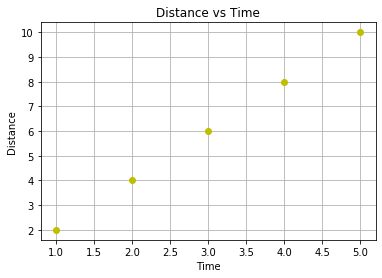

([2, 4, 6, 8, 10], [1, 2, 3, 4, 5])

In [75]:
distance = list(range(2,11,2))
time = list(range(1,6))
plt.title("Distance vs Time")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.plot(time,distance,'yo')
plt.grid()
plt.show()
distance,time

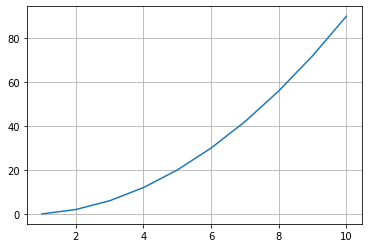

In [76]:
t = list(range(1,11))
a = list(range(1,len(t)+1))
v = [a[i] * i for i in range(len(t))]
plt.plot(t,v)
plt.grid()
plt.show()

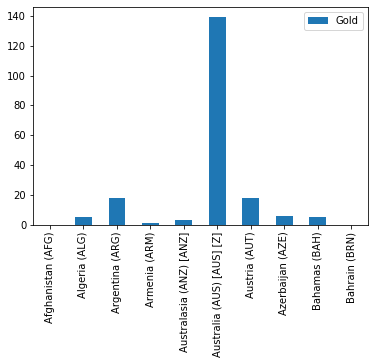

In [77]:
df[['Gold']][:10].plot(kind='bar')